In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_rows",100)  # Show all rows
pd.set_option("display.max_columns",32)


df = pd.read_csv('/content/hotel_bookings.csv')

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88994,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,USA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,128.0,NaN,0,Transient-Party,80.75,0.0,1.0,Check-Out,2016-05-16
88995,City Hotel,0,191,2016,May,20,11,1,4,2,0.0,0,BB,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,100.30,0.0,0.0,Check-Out,2016-05-16
88996,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,128.0,NaN,0,Transient-Party,80.75,0.0,1.0,Check-Out,2016-05-16
88997,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,USA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,128.0,NaN,0,Transient-Party,80.75,0.0,0.0,Check-Out,2016-05-16


In [27]:
df.shape

(74108, 32)

In [30]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,88999.000000,88999.000000,88999.000000,88999.000000,88999.000000,88999.000000,88999.000000,88999.000000,88995.000000,88999.000000,88999.000000,88999.000000,88999.000000,88999.000000,75682.000000,5319.000000,88999.000000,88998.000000,88998.000000,88998.000000
mean,0.496399,107.746930,2016.034360,27.119237,15.717840,0.960089,2.614052,1.851965,0.099792,0.008360,0.035675,0.114889,0.162845,0.203699,106.530404,186.176161,2.862605,97.511271,0.069844,0.475820
std,0.499990,110.110841,0.726265,13.901798,8.789402,1.038443,2.031522,0.592190,0.393510,0.101771,0.185478,0.973954,1.683678,0.631148,117.086941,131.178452,19.615561,52.721280,0.258562,0.743837
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,63.030000,0.000000,0.000000
50%,0.000000,72.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,178.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,166.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,270.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13317
company                           83680


In [39]:
df['country']
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)
df['country']


0        PRT
1        PRT
2        GBR
3        GBR
4        GBR
        ... 
88994    USA
88995    NOR
88996    FRA
88997    USA
88998    ITA
Name: country, Length: 88999, dtype: object

In [41]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13317
company                           83680


In [47]:
df[['hotel',
    'is_canceled',
    'lead_time',
    'arrival_date_year',
       'arrival_date_month',
     'arrival_date_week_number',
       'arrival_date_day_of_month',
    'stays_in_weekend_nights',
       'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'meal',
       'country',
    'market_segment',
    'distribution_channel',
       'is_repeated_guest',
    'previous_cancellations',
       'previous_bookings_not_canceled',
     'reserved_room_type',
       'assigned_room_type',
    'booking_changes',
    'deposit_type',
    #'agent',
       #'company',
     'days_in_waiting_list',
    'customer_type', 'adr',
       'required_car_parking_spaces',
    'total_of_special_requests',
       'reservation_status',
     'reservation_status_date']].copy()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88994,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,USA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,80.75,0.0,1.0,Check-Out,2016-05-16
88995,City Hotel,0,191,2016,May,20,11,1,4,2,0.0,0,BB,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,100.30,0.0,0.0,Check-Out,2016-05-16
88996,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,80.75,0.0,1.0,Check-Out,2016-05-16
88997,City Hotel,0,196,2016,May,20,12,1,3,2,0.0,0,BB,USA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,80.75,0.0,0.0,Check-Out,2016-05-16


In [49]:
# "How can we analyze reservation statuses and their impact on revenue management strategies
status_adr = df.groupby('reservation_status')['adr'].mean()
status_adr
#Observation
#1.The average daily rate (ADR) for reservations that were canceled is approximately 105.24.
#2.The average daily rate (ADR) for reservations that were successfully checked out is approximately 90.12.
#3.The average daily rate (ADR) for reservations marked as No-Show is approximately 96.62.

reservation_status
Canceled     105.238834
Check-Out     90.123903
No-Show       96.618243
Name: adr, dtype: float64

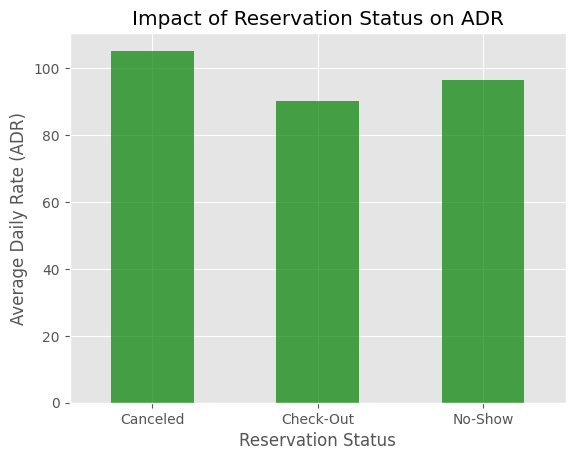

In [52]:
# Plot the average ADR by reservation status
status_adr.plot(kind='bar', color='Green', alpha=0.7)
plt.xlabel('Reservation Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Impact of Reservation Status on ADR')
plt.xticks(rotation=0)
plt.show()

In [54]:
#How do booking changes impact the customer experience and hotel operations? Can we optimize the booking change process?
changes_adr = df.groupby('booking_changes')['adr'].mean()
changes_adr


booking_changes
0      97.188413
1      97.931243
2     102.776651
3     106.168006
4     103.205247
5     104.755385
6      98.332766
7      92.629545
8     104.890000
9      98.891429
10    108.016667
11      0.000000
12     75.000000
13     86.570000
14    187.850000
15    124.100000
16     46.880000
17     59.925000
20      0.000000
21      0.000000
Name: adr, dtype: float64

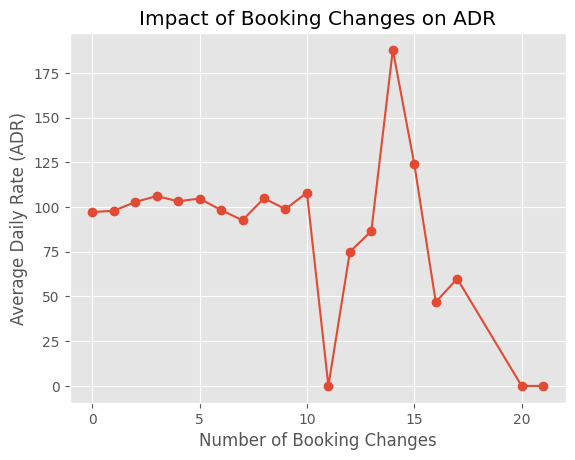

In [56]:
plt.plot(changes_adr.index, changes_adr.values, marker='o')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Impact of Booking Changes on ADR')
plt.grid(True)
plt.show()

In [58]:
#"Can we identify trends in special requests and leverage them to enhance the overall guest experience
special_requests_counts = df['total_of_special_requests'].value_counts()
special_requests_counts
#Observation
#The majority of bookings (58,122) did not have any special requests
#A significant number of bookings (21,226) had one special request.

0.0    58122
1.0    21226
2.0     8041
3.0     1415
4.0      176
5.0       18
Name: total_of_special_requests, dtype: int64

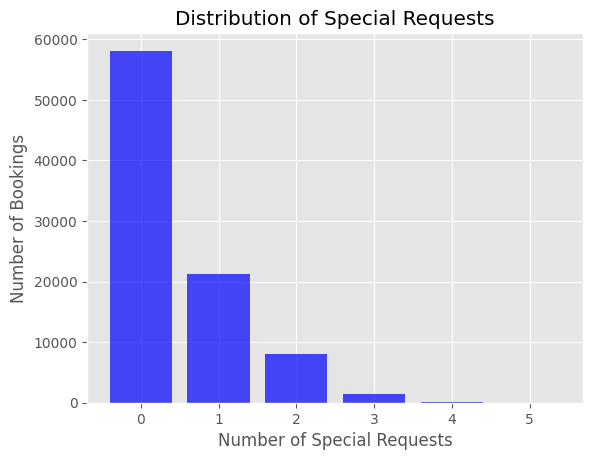

In [62]:
# Plot a bar chart to visualize the distribution of special requests
plt.bar(special_requests_counts.index, special_requests_counts.values, color='blue', alpha=0.7)
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Special Requests')
plt.show()

In [67]:
selected_columns = ['total_of_special_requests', 'customer_type', 'reserved_room_type', 'arrival_date_month', 'adr']
selected_columns

['total_of_special_requests',
 'customer_type',
 'reserved_room_type',
 'arrival_date_month',
 'adr']

In [69]:
subset_df = df[selected_columns ]
subset_df

,total_of_special_requests,customer_type,reserved_room_type,arrival_date_month,adr
0,0.0,Transient,C,July,0.00
1,0.0,Transient,C,July,0.00
2,0.0,Transient,A,July,75.00
3,0.0,Transient,A,July,75.00
4,1.0,Transient,A,July,98.00
...,...,...,...,...,...
88994,1.0,Transient-Party,A,May,80.75
88995,0.0,Transient,A,May,100.30
88996,1.0,Transient-Party,A,May,80.75
88997,0.0,Transient-Party,A,May,80.75


In [73]:
correlation_matrix = subset_df.corr()
correlation_matrix
#This positive correlation coefficient indicates a weak positive linear relationship between the two variables.( 0.145599.)
# In other words, on average, bookings with a higher count of special requests seem to be associated with a slightly higher room rate.
#number of special requests made by guests increases, there is a tendency for the average daily rate (ADR) to also increase slightly.

<ipython-input-73-81d929f0e7e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


,total_of_special_requests,adr
total_of_special_requests,1.000000,0.145599
adr,0.145599,1.000000


In [75]:
#What are the booking patterns across different months of the year, and how can we adjust our operations and marketing strategies accordingly
booking_counts = df.groupby('arrival_date_month')['arrival_date_month'].count()
booking_counts

arrival_date_month
April        9106
August       9809
December     5409
February     6473
January      4638
July         8478
June         6715
March        7688
May          8337
November     5068
October      8942
September    8336
Name: arrival_date_month, dtype: int64

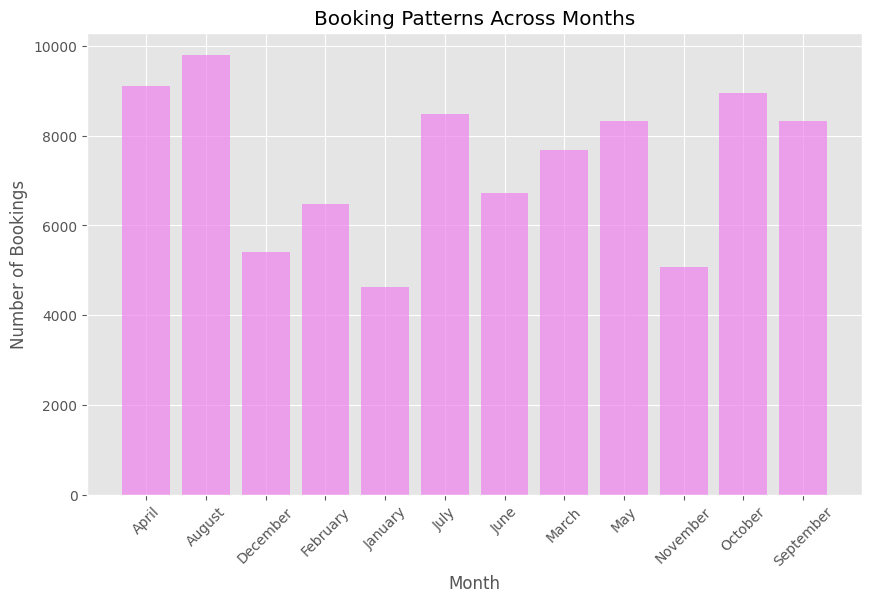

In [81]:
#What are the booking patterns across different months of the year, and how can we adjust our operations and marketing strategies accordingly
plt.figure(figsize=(10, 6))
plt.bar(booking_counts.index, booking_counts .values, color='violet', alpha=0.7)
#booking_counts.plot(marker='o', color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Booking Patterns Across Months')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()